# In this notebook we will take a look at the __Housing Price__ Dataset and implement some Machine Learning Algorithms

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Importing the data

In [10]:
housing = pd.read_csv('D:\Github\My Repository\Machine-Learning\Data\housing.csv')

## Initial exploration of the data
1. info() -> Gives a list of all the columns along with the data type and count of all non-null values
2. describe() -> Gives statistical breif about the columns

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Things to note:
- All except ocean_proximity column have float values
- total_bedrooms column has some null values

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This gives an overall understanding about the values within a column
_The analysis ignores any null values_

## Visulazing the data
We will look at the distribution for each column and try to understand a little bit about our data

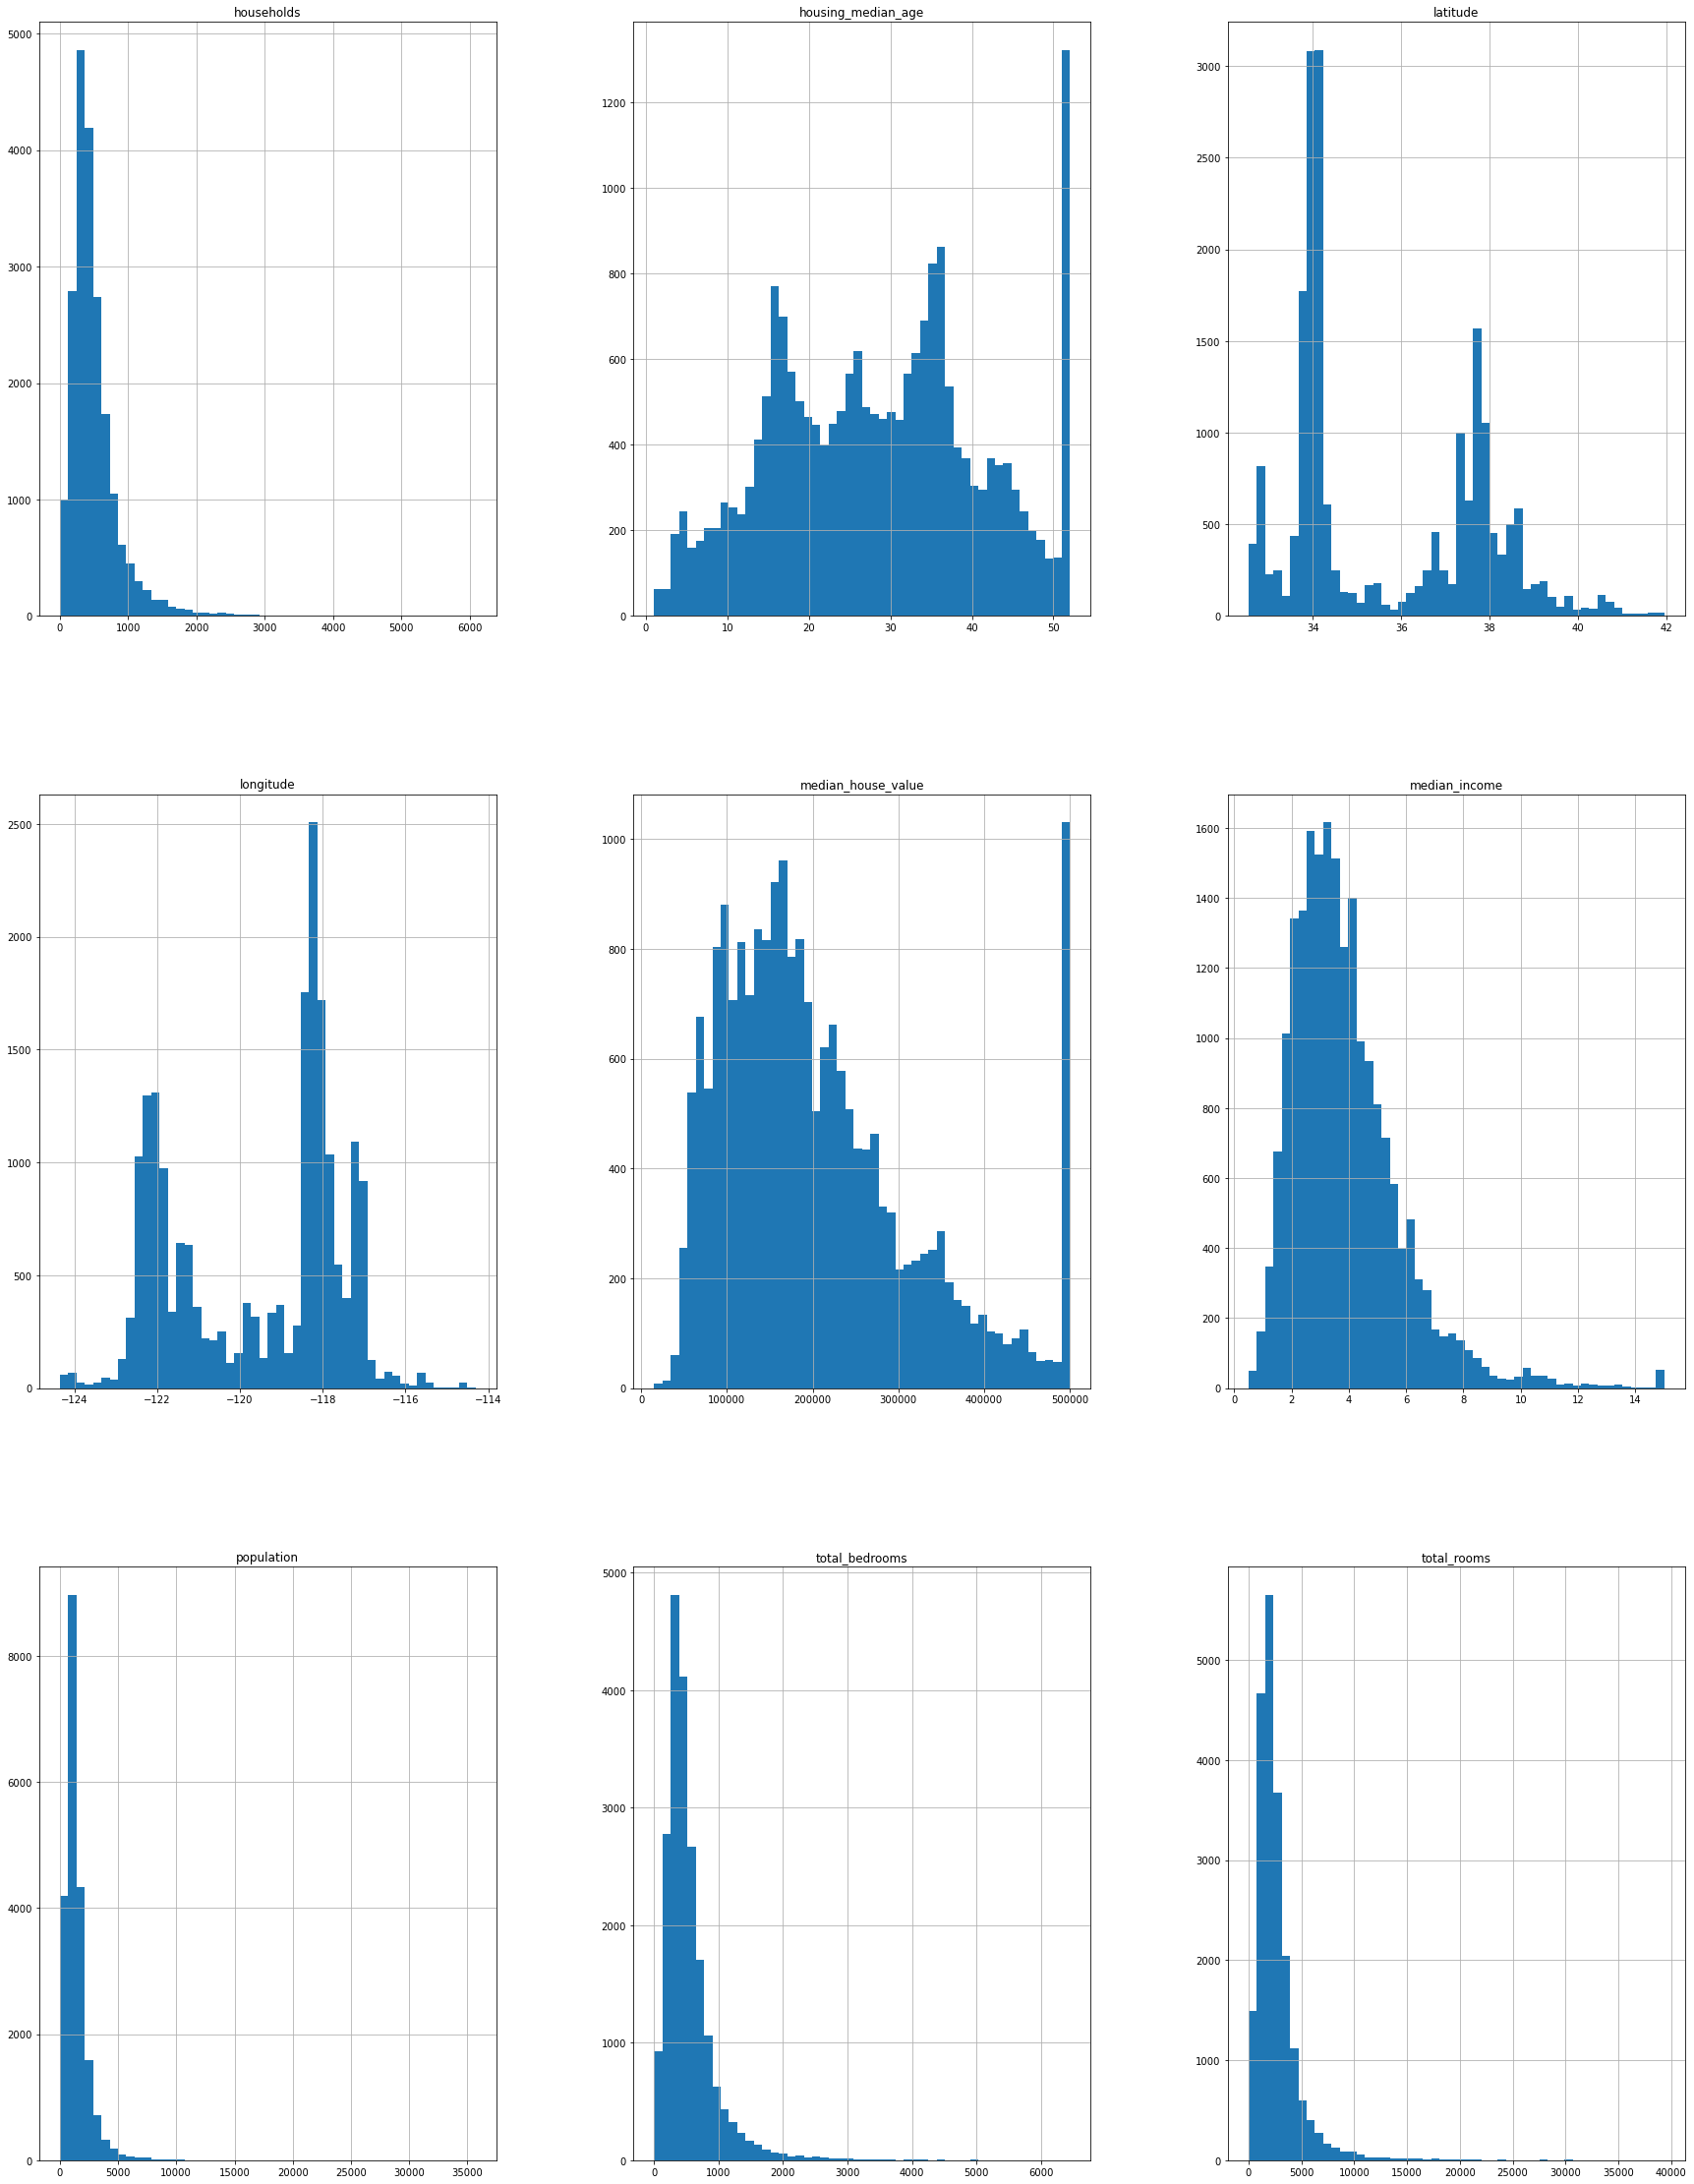

In [18]:
housing.hist(figsize=(30, 40), bins=50)
plt.show()

Things to note:
- `housing_media_age` seems to cap at 50, i.e. any value above 50 is considered 50. We could ask for a detailed data or ignore any row with 50 age
- A similar cap can be seen for `median_house_value`
- `median_income`, `population`, `total_bedrooms` and `total_rooms` are right skewed

Let's look at the correlation among the columns

In [21]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)  # Since we are only interested in the output

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Things to note:
- `median_income` is very positively correlated with `median_house_value`, which makes sense as income of an individual increases, he/she is willing to pay more for a house
- Looking at location, `latitude` seems to have a strong negative correlation where as `longitude` doesn't have that much impact

## Let's add some more features and check their correlation

In [22]:
_data = housing.copy()  # Creating a copy for this particular analysis
_data['household_per_population'] = _data['households']/_data['population']
_data['bedrooms_per_room'] = _data['total_bedrooms']/_data['total_rooms']
_data['rooms_per_household'] = _data['total_rooms']/_data['households']
_data['population_per_household'] = _data['population']/_data['households']

_data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
household_per_population    0.264910
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Things to note:
- Within the 4 new features added, `household_per_population` and `bedrooms_per_room` seems to have strong correlations
- `rooms_per_bedroom` has a slightly positive correlation
- `population_per_household` has very less negative correlation

We could spend more time and come up with additional features, but for the time being we will work with these features only

## Splitting the data
We need to split the data into training and test set, so that we can trian our models on training set and finally evaluate on the test set. In order to do so we could:
- Use scikit learn split***
- Or, look at the highest correlated column and make sure that it is divided correctly

For this notebook, we will go through the second method. From the previous correlation matrix, we know that `median_income` is very strongly correlated with our output. So let's first look at the distribution for `median_income`

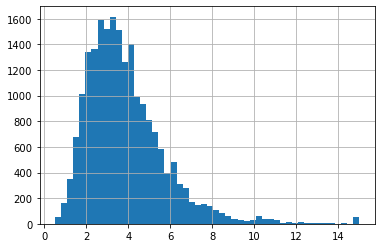

In [24]:
housing['median_income'].hist(bins=50)
plt.show()

Here, we can we it's skewed towards the right side a little. Let's create a new column with a normal distribution based on `median_income`